In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df=pd.read_csv("C:/Users/Expert/Downloads/co2-mm-mlo.csv - co2-mm-mlo.csv.csv",parse_dates=["Date"],index_col="Date")

In [37]:
df.head(5)

,Decimal Date,Average,Interpolated,Trend,Number of Days
Date,,,,,
1958-01-03,1958.208,315.71,315.71,314.62,-1
1958-01-04,1958.292,317.45,317.45,315.29,-1
1958-01-05,1958.375,317.50,317.50,314.71,-1
1958-01-06,1958.458,-99.99,317.10,314.85,-1
1958-01-07,1958.542,315.86,315.86,314.98,-1


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-39-2d627eff616e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp=seasonal_decompose(df["Interpolated"],freq=52)


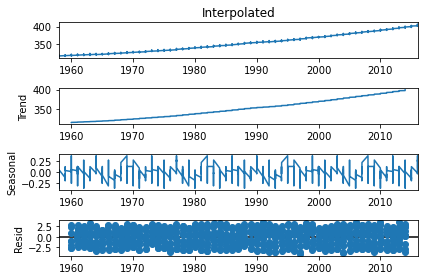

In [39]:
decomp=seasonal_decompose(df["Interpolated"],freq=52)
fig=decomp.plot()

In [40]:
from pmdarima import auto_arima

In [41]:
auto_arima=auto_arima(df["Interpolated"],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1387.127, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2290.715, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1814.502, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1870.801, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2296.126, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1653.292, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1386.297, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1721.966, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1623.903, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1387.341, Time=1.34 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1551.476, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1388.522, Time=1.61 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1476.010, Time=0.17 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 6.831 seconds


In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model=ARIMA(df["Interpolated"],order=(1,1,0))
model_fit=model.fit()

C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [44]:
ypred=model_fit.predict()
print(ypred)

Date
1958-01-04    0.134017
1958-01-05    1.261817
1958-01-06    0.075016
1958-01-07   -0.240996
1958-01-08   -0.830885
                ...   
2016-01-08   -1.659539
2016-01-09   -1.462909
2016-01-10   -0.816840
2016-01-11    0.419118
2016-01-12    1.416312
Length: 705, dtype: float64


In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Interpolated   No. Observations:                  705
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -904.251
Method:                       css-mle   S.D. of innovations              0.872
Date:                Tue, 06 Jul 2021   AIC                           1814.502
Time:                        14:05:27   BIC                           1828.177
Sample:                             1   HQIC                          1819.787
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1340      0.110      1.219      0.223      -0.081       0.350
ar.L1.D.Interpolated     0.7022      0.027     26.201      0.000       0.650       0.755
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4240           +0.0000j            1.4240            0.0000
-----------------------------------------------------------------------------
"""

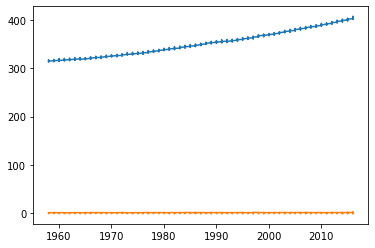

In [46]:
plt.plot(df["Interpolated"])
plt.plot(ypred)

In [47]:
from pmdarima import auto_arima

In [48]:
auto_arima=auto_arima(df["Interpolated"],trace=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=443.782, Time=4.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2290.715, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1552.865, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2296.126, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=734.952, Time=4.40 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=476.961, Time=9.93 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=512.120, Time=9.05 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1387.127, Time=1.17 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=8.95 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=583.645, Time=9.60 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=470.232, Time=12.94 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=441.866, Time=3.25 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : A

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Expert\Documents\Desktop\soft\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


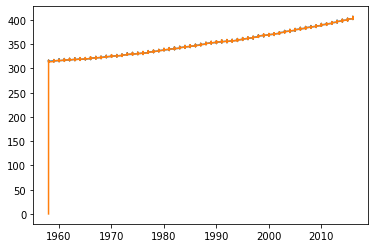

In [50]:
model=SARIMAX(df["Interpolated"],order=(0,1,3),seasonal_order=(1,0,1,12)).fit(disp=0)
ypred=model.predict()
plt.plot(df["Interpolated"])
plt.plot(ypred)